# Clustering Sc-10x data

There are 1581 cells to be analyzed. <br>
Please refer to:
file:///Users/waynewu/4.Github/Clustering-for-scRNAseq/dataset/sc-10x/web_summary.html

n_obs: number of cells <br>
n_vars: number of features

### adata:
n_obs x n_vars (1581 x 33538)
1. use indexing and .X to get data. Ex. adata[:, meta].X
2. matrix.A1: transform to ndarray

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.23.0 scikit-learn==0.20.3 statsmodels==0.10.1


In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
# Read in th data
adata = sc.read_10x_mtx(
    './dataset/sc-10x/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)     

... reading from cache file cache/dataset-sc-10x-filtered_feature_bc_matrix-matrix.h5ad


In [4]:
adata

View of AnnData object with n_obs × n_vars = 1581 × 33538 
    var: 'gene_ids', 'feature_types'

# Preprocessing the data

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


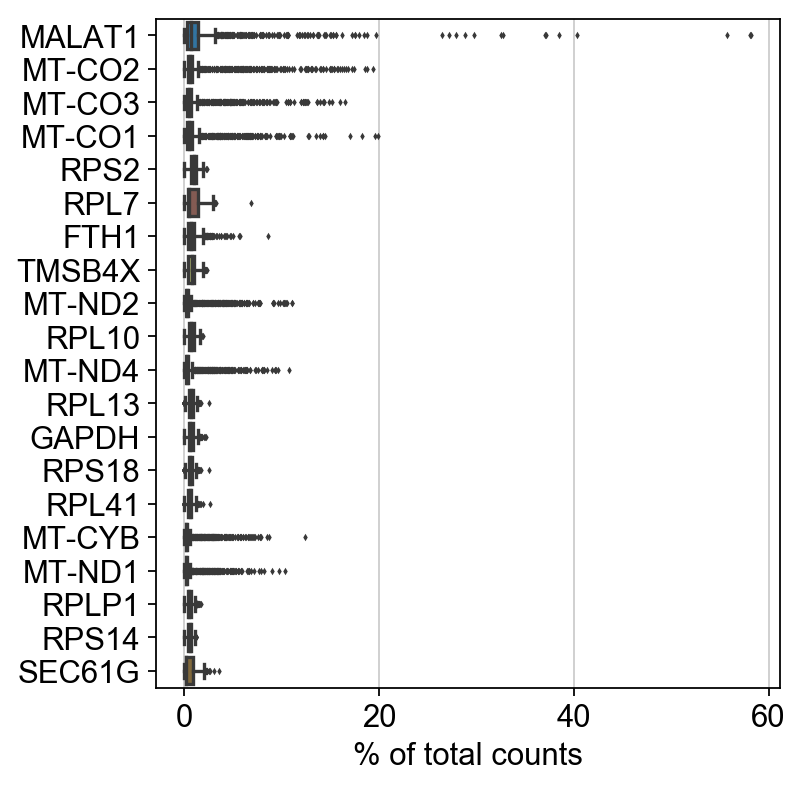

In [5]:
# Show those genes that yield the highest fraction of counts in each single cells, across all cells
sc.pl.highest_expr_genes(adata, n_top=20)

In [6]:
# Filter out cells with less than 200 genes and genes that are detected less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 3 cells that haveless than 200 genes expressed


Trying to set attribute `.obs` of view, making a copy.


filtered out 15781 genes that are detectedin less than 3 cells


In [7]:
# Quality Measure of mitochondrial genes
# Get the MI percentage of each cell
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

... storing 'feature_types' as categorical


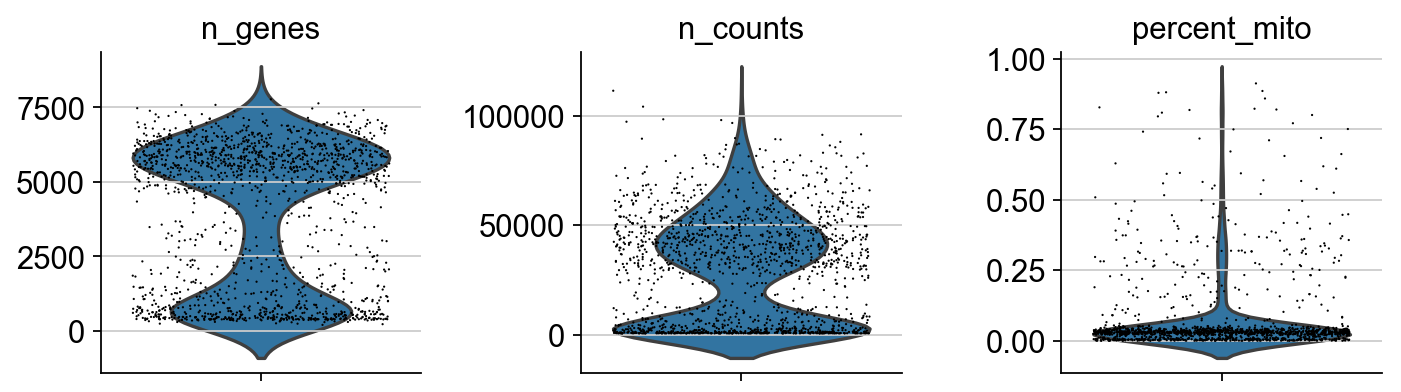

In [8]:
# Computed quality measures
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

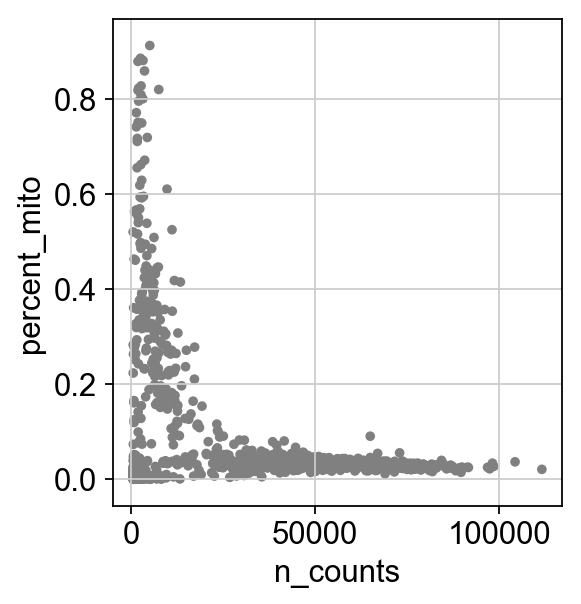

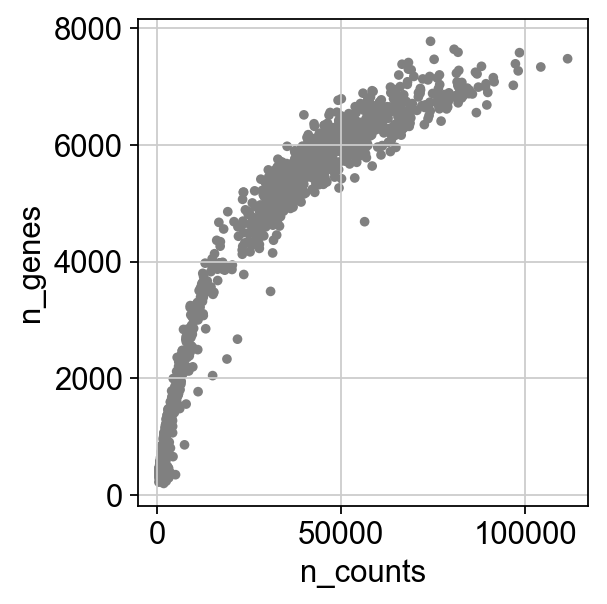

In [9]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [10]:
# Normalize total counts to 10,000 reads per cell
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# logarithmic the data
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [11]:
adata.raw = adata

# Run PCA and embed the graph

computing PCA with n_comps = 50
    finished (0:00:02)


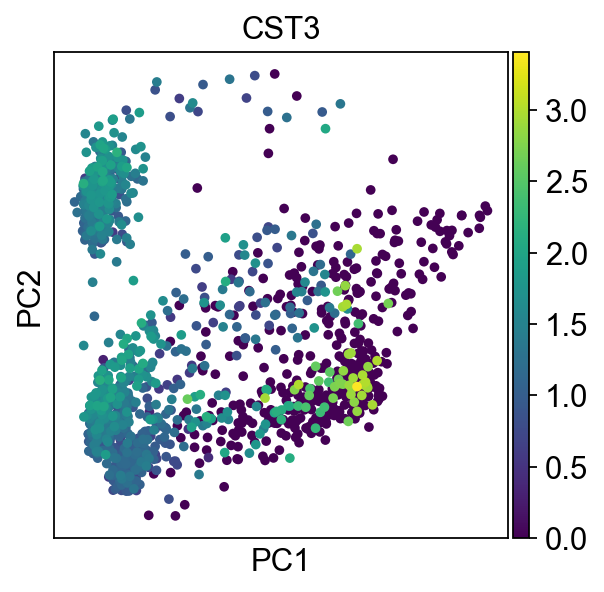

In [12]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')

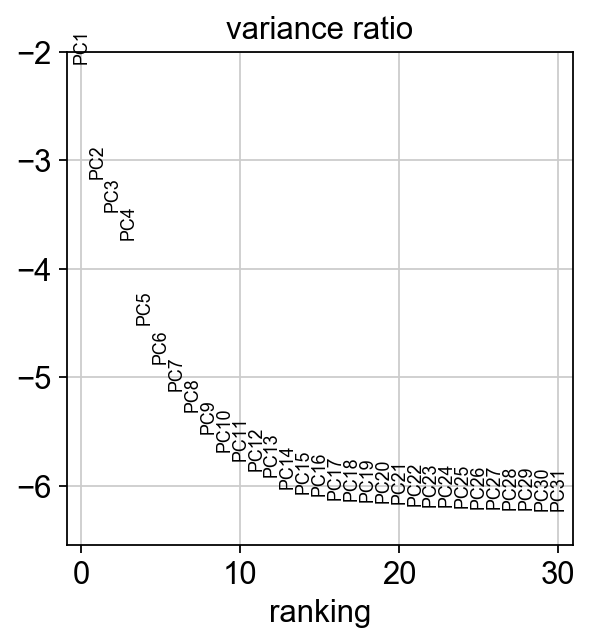

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
# Calculate the neighbors
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
# use UMAP to embed the graph
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


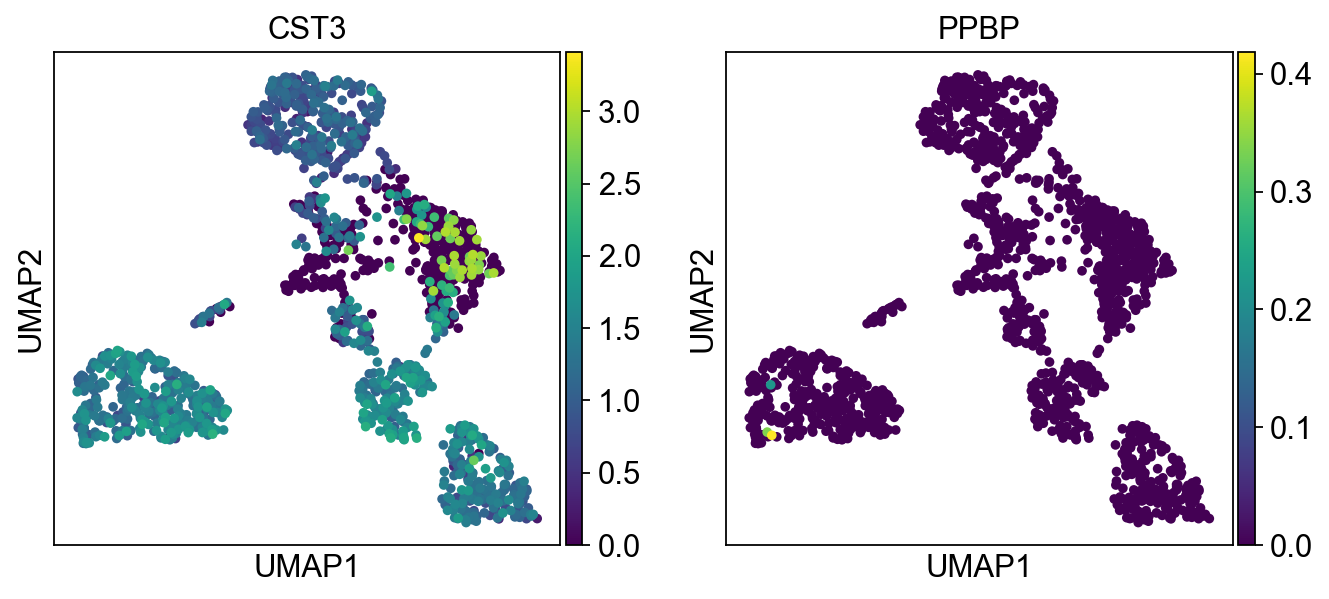

In [15]:
sc.pl.umap(adata, color=['CST3', 'PPBP'])

# Clustering the neighborhood graph

In [18]:
sc.tl.louvain(adata)
sc.pl.umap(adata, color=['louvain', 'CST3', 'NKG7'])

running Louvain clustering


ModuleNotFoundError: No module named 'igraph'